## Scientific Question: Is keratin structurally the same in humans and house mice?
Keratin is a protein that makes up most of the structure in things like skin, hair, nails, and similar external structures in vertebrates (animals with a backbone or spinal column). Humans and house mice both fall into the category of vertebrates. One of the genes that produces keratin in both of these species is KRT1. The KRT1 in both species are considered orthologs; homologous genes in different species that are related by descent from a common ancestor.

## Scientific Hypothesis: If keratin is structurally the same in both humans and house mice then performing a comparison between the sequences of the KRT1 gene and models of the keratin protein from both species should result in many similarities.
To test my hypothesis, I will be comparing the sequences of KRT1 genes in humans and house mice using pairwise sequence alignment. I will also be comparing models of the keratin protein that are produced by humans and house mice. I am still figuring out how I should be comparing these models so I can't go in depth on the explanation yet, any help would be appreciated. I plan on visualizing the pairwise sequence alignment data using a dot plot and the results from the protein model comparison using another method (possibly heat map).

The data I used was sourced from NCBI(nucleotide) website as well as the SWISS protein database. I downloaded the sequence data as a FASTA file from the NCBI website and I downloaded the protein structures as a .pdb file from the SWISS protein database.

## Loading in Packages
- Biopython: Biopython is a package designed for biology related computation written in python. Biopython consists of many different projects that all do specialized tasks. The packages that will be imported for this notebook are Bio.SeqIO, Bio.pairwise2, and format_alignment from within the Bio.pairwise2 package. Bio.SeqIO is the standard input/output interface of Biopython. Bio.pairwise2 is used to perform pairwise alignment. 
https://biopython.org/
- Pylab: Pylab is an application programming interface (API) that included many various functions such as matplotlib.pyplot, numpy, and more. It was made to replicate a MATLAB type of working experience by importing all of the functions into the global namespace. This was possible because it contained all of the functions under one module (Pylab) rather than multiple. Although it still works, it is highly discouraged in the current era of coding as importing into the global namespace can cause unexpected errors to occur. It is recommended to use each function separately.
https://matplotlib.org/stable/api/index.html?highlight=pylab#module-pylab

In [1]:
#Need to download biopython and install it, already had it installed
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [42]:
#There will likely be more packages that need to be downloaded or imported in the final draft
from Bio import pairwise2
from Bio import SeqIO
from Bio.pairwise2 import format_alignment
import pylab

## Performing Bioinformatics Analysis
Pairwise sequence alignment is a bioinformatics method that compares two sequences with each other and determines the similarity between those sequences. It identifies regions that are similar and has two ways it could be done. In the local alignment variation, it compares a specific region of each sequence to each other. In the global alignment variation, it compares the entire sequence from start to finish with each other. I decided to use the global alignment variation because I would like to compare the genes in their entirety.

In [38]:
#Check for string elements in sequence files using variable.read()

#Open human gene sequence file
x = open(r'humangene.fna','r')

#Read file, define global variable KRT1human
KRT1human = x.read()

#Close file
x.close()

#Open mouse gene sequence file
y = open(r'mousegene.fna','r')

#Read file, define global variable KRT1mouse
KRT1mouse = y.read()

#Close file
y.close()

#code check by running the variable assigned to each file, e.g. 'KRT1human'

In [25]:
#Use of built in python length function to measure the number of characters in a string
#After running the previous cell's code check, copy the unneccesary portions of the sequence file and define them as variables

#This is done to see how many characters need to be removed before starting the pairwise sequence alignment, define global variable bad_human
bad_human = ">NC_000012.12:c52680407-52674736 KRT1 [organism=Homo sapiens] [GeneID=3848] [chromosome=12]"

#This second check is to determine where the first gene sequence ends since the alignment is only between the first genes from the dataset, define global variable bad_human2
bad_human2 = ">NC_000012.12:c52680407-52674736 KRT1 [organism=Homo sapiens] [GeneID=3848] [chromosome=12]\nAGAGGAGTGTTTAGCTCCTTCCCTTACTCTACCTTGCTCCTACTTTTCTCTAAGTCAACATGAGTCGACA\nGTTTAGTTCCAGGTCTGGGTACCGAAGTGGAGGGGGCTTCAGCTCTGGCTCTGCTGGGATCATCAACTAC\nCAGCGCAGGACCACCAGCAGCTCCACACGCCGCAGTGGAGGAGGTGGTGGGAGATTTTCAAGCTGTGGTG\nGTGGTGGTGGTAGCTTTGGTGCTGGTGGTGGATTTGGAAGTCGGAGTCTTGTTAACCTTGGTGGCAGTAA\nAAGCATCTCCATAAGTGTGGCTAGAGGAGGTGGACGTGGTAGTGGCTTTGGTGGTGGTTATGGTGGTGGT\nGGCTTTGGTGGTGGTGGCTTTGGTGGTGGTGGCTTTGGTGGAGGTGGCATTGGGGGTGGTGGCTTTGGTG\nGTTTTGGCAGTGGTGGTGGTGGTTTTGGTGGAGGTGGCTTTGGGGGTGGTGGATATGGGGGTGGTTATGG\nTCCTGTCTGCCCTCCTGGTGGCATACAAGAAGTCACTATCAACCAGAGCCTTCTTCAGCCCCTCAATGTG\nGAGATTGACCCTGAGATCCAAAAGGTGAAGTCTCGAGAAAGGGAGCAAATCAAGTCACTCAACAACCAAT\nTTGCCTCCTTCATTGACAAGGTGAGTTTCTCTCTCATTGCACTGGTAGGGCTGCCGCTGGTCCACTTGGG\nATTGGTGCAGTCAAAACACAGTAGGTTTGAACCTCAAGTTTCCATGTTTACATGATTAAAAGGATGTTTT\nGTGGAATGGTCTCCTAGGAGATATGTTAGATGTATGCTTGTGAATGGTGTTAATGACTCTCTCTTTGACA\nAAGGGTTCGTGGTCGACCTAAAGGTGGGTCAGTGTGACATTAACATTTAAGTGCTTTTTATTCAGCTCTT\nGAGCGGAATTGGGACTCATATCTGTTGAATGAAGATAATAGAAATGGGGCTAACTGAACTTTCCAGGGTG\nCAAGTGAGAACCCTGGAAAGGTCTTCCTAACCATAGAAAGGGAGTTGAGTGTGAACATAGTATAGAGTGT\nTATTGTAGCAGAAAACATGTGGTCAGTCAGTGCCAAACATCTTTTGCTGTCAGAGGGGAGCTCTGCCTTC\nTAATAATTTTACATTGGTACTGGATGAGGCTAGAGTTTTTTTATACTAATATCTCCAAAAATCAGCTCTA\nAAAAACTCAGATAAACCATTTTTTTAATTTTTTGCTTAATCATTAATAGTGCCAATCCAAGGTTATCCAC\nAACAAATTTCAAATCCAATTTTGAATTTTCCTGATATACTTTTGAAATGTGTGTGTGTCCTGGGGATGCA\nAACCAGTTTTTATGGTAATATACCTAACAAAATTTTGGAAGGCAAATCTCTTAAATACCATGCACCTATT\nTCAAAACATAATTGCAATAATTCTGTATGCGCTTTGCTATTGGTATTTGTTTAGTTACTCCCTTCCAAGC\nCCTCTCTGAATTAACAAGTTGGGTTTTATTATGCAGATGATATTAACTTGATCATCTTCTTCCTATTTCT\nCTGTCATGGTCAGAAGATAGGAATTGAGGTTCTTTTCCAAATGAGGCACAGTTCTCCATGGCTATGAGAC\nTCCATTTATGCATCAGGAGTAAAGGGGTCTTGTGTTTTTAGGTGAGGTTCCTGGAGCAGCAGAACCAGGT\nACTGCAAACAAAATGGGAGCTGCTGCAGCAGGTAGATACCTCCACTAGAACCCATAATTTAGAGCCCTAC\nTTTGAGTCATTCATCAACAATCTCCGAAGGAGAGTGGACCAACTGAAGAGTGATCAATCTCGGTTGGATT\nCGGAACTGAAGAACATGCAGGACATGGTGGAGGATTACCGGAACAAGTAAGGGACCCTGTCTGGGCAGTT\nCTTAACTTTTGCTGTAAAAGAGTTCCAGAAAGTAATAAGCTAAGATCATGAAGCAGCATGTAGCTATGTC\nTTTTCTTAGGTTAGAGGCACATCAGTTTGACATTTTCAGAAATCTTCATTTTCTCAGGAGATGGAAATAG\nTCTAGTGGTTTTATTGCTCAGTAGAAAGTAGTGGCCAATATGTCCTAGGTTCATAATAGAAAGGCAGTGA\nTAGGCAATGCCACCTTTAGTTTAGAATGCTGGACTTCAGGTCTTACCACCTCTGAATCTCCTAATTGTTT\nCTGCTTTCCTGCAGGTATGAGGATGAAATCAACAAGCGGACAAATGCAGAGAATGAATTTGTGACCATCA\nAGAAGGTAAGCAAATTCTGTAGGACGGAACTCACATTTGAAATAAATAAGGGAAGAGGGTCTCCAATTAC\nTAAGCAGAAAGCAGCCATGATATGGAGAGCCAGGTAGTAGACCTGGGGAGTATATGGAGTGGGGCTATAT\nTTTCACATCATCATGGACCTGGACTGATCCAGGCACTTGGCTTCTCCATATTTCCCAGCACCTTACATAG\nTAAGTGGAGTGGCAGATTCTCAGCAAGCCAGGCACACTCCCTTGATGGTGCTATCCGGGGGTGGGACAGT\nTAGGGAACTGTGATTTACCTGGGGCAAAAAGGAGTGGAGTAGACCCAAAGCTCCTTTTTTTGCTTGGAGA\nATCCCCTCACAGGTAATGAGAGGGACCTGCCCTGGAGAGAATGTGCCTTCATGATGTCCCTTGTTCCTCT\nAGGATGTGGATGGTGCTTATATGACCAAGGTGGACCTTCAGGCCAAACTTGACAACTTGCAGCAGGAAAT\nTGATTTCCTTACAGCACTCTACCAAGCAGTAAGTCTTCCAGTTTCAACCAAGTTTATCTAAATGGAGAGT\nTTTTAAGCCTGAACCCACAACGATTCAGAAGAATAGATATTTATCTTTTATTTTCTGACTGCTTTCTCTG\nTCTAAGTTGTTTTTTGTTTTAGTGCTGTAAGAGTCACTAACCTATTATGTCTTGCAGGAGTTGTCTCAGA\nTGCAGACTCAAATCAGTGAAACTAATGTCATCCTCTCTATGGACAACAACCGCAGTCTCGACCTGGACAG\nCATCATTGCTGAGGTCAAGGCCCAGTACGAGGATATAGCCCAGAAGAGCAAAGCTGAGGCCGAGTCCTTG\nTACCAGAGCAAGGTGAGTGGGCTGAAAGCCTAGCCAGTTTCCCTGAAATGGCTTGTCTTGCTATCCTGTG\nTTATCTCATGTATGTGTGCCTGTGCCATGCTGAGTTCTGCCTACATTTAACAAACGCTATCTACCATCTT\nTAGTATGAAGAGCTGCAGATCACTGCTGGCAGACATGGGGATAGTGTGAGAAATTCAAAGATAGAAATTT\nCTGAGCTGAATCGTGTGATCCAGAGACTTAGATCTGAAATCGACAATGTCAAGAAGCAGGTATGTGCTTT\nCTCCTTCTACCACTCAGCTGTATGGAATGGGGGTAACCCTCAGGTAAAGGGCGAGTGCTTTCCTAGTTTT\nGAATCTTGCAATTCATCCCAAGGCTACATTATTATCCCTGGTTCCTTTTGTGACTATGCTAGTTTCCAGA\nATGCAGCCATCATGCTGGGTTCTCTTTAGGGAAATCTGTGAGAATGGCCTAGTAGAGAAAGATGGGATGG\nTCAATGTGAGTGATCTAGCCTATGACCCAAAGTGGACTTAAGAGTTGGGGAGTGAGAGGAAGGGCAGCCA\nGGAGGTTTTAGAGTAGGTGTTTAGAAGAATGTCAAGTCTGTAAGGGTTGTAGGAGCCTTGACTCAGGGCC\nAAGAGAGGCTGTTGAGTTATCCCTAAGGTCTTTTAAGGAAGTCAACATGGTGATGTGTTATCTGGAGGTG\nGGTGTGAGATGACTTAAGGCCAAGTGGTTCTGTTGGACTCATTATTGGCCTCACTGGAGTGGGGAGACCA\nATTGGGATGAGGAGGCCTAGTGGGGAATGCATATTATGAGAGGGTGTCATATTCTTTTTCAGATCTCCAA\nCTTGCAGCAGTCCATCAGTGATGCAGAGCAGCGTGGCGAGAATGCCCTCAAGGATGCCAAGAACAAGCTG\nAATGACCTGGAGGATGCCCTGCAGCAGGCCAAGGAAGACCTGGCCCGCCTGCTGCGCGACTACCAGGAGC\nTGATGAACACAAAGCTGGCCCTGGATCTGGAGATTGCCACCTACAGGACCCTCCTGGAGGGAGAAGAAAG\nCAGGTGAGGAAGGGACGCTGGGAGTCGAACCTCTTCTCATGGTCTTCCTTCCTTGCAAGCTGATTGTTGT\nTGAAGATGCAGCCATCTGATTGCAGCTTGTGCTGGGTATGGGGAAATGAAAAGTACACGGAGCAGGAGGA\nAGGACCTAGTTTTACTTTGGGAGCTGGAGTCCCAAGCTGTTTATTTTTTTCTTCTAGGGCTGTAACATAT\nCTAGAAAGAGCTTTGAGGTGGAGCAAATTATTCTTTATCTGGGCTGCCTCAGATGGCAGCTGGCCTAAAG\nTCGGCATCTTTAGAGGGGGCCTTCATTGGCTGCAAGGCTCTTGTCTCGTTTATATGGGAATTTCTCCGTG\nTTTGTACTCTTGCTGAGAAAAAATGACAGGTCTGGGAGGCCAGAGGGGATTGGATTAAGTTTCAGATTAA\nGTGCATTGGAGAAGACCCAGATGGGGAAAGTCTTCAAGGTGGTGGAGCGGGGAATGGGGAAGCGGTTTGG\nGAAGCTGGAGTGTCCTGAGGAATTTTCTTATTTTCTCCTACAGGATGTCTGGAGAATGTGCCCCGAACGT\nGAGTGTGTGTAAGTACAAGTCGATTTCTCAGGGGCATGTGCAGGCTTTGTTGGGCTGGAAACGGAGTTGA\nGGTTGAAAATAACTGAGCTTCCTCTTGCAGCTGTGAGCACAAGCCACACCACCATCAGTGGAGGTGGCAG\nCCGAGGAGGTGGCGGCGGTGGCTACGGCTCTGGAGGTAGCAGCTATGGCTCCGGAGGTGGTAGCTATGGT\nTCTGGAGGTGGCGGCGGCGGCGGCCGTGGCAGCTATGGCTCCGGAGGTAGCAGCTACGGCTCCGGAGGTG\nGCAGCTATGGCTCTGGAGGTGGCGGCGGCGGCCATGGCAGCTACGGCTCCGGAAGCAGCAGTGGGGGCTA\nCAGAGGTGGCTCTGGAGGCGGCGGCGGCGGCAGCTCTGGCGGCCGGGGCTCTGGCGGCGGGAGCTCTGGA\nGGCTCCATAGGAGGCCGGGGATCCAGCTCTGGGGGTGTCAAGTCCTCTGGTGGCAGTTCCAGCGTGAAGT\nTTGTTTCTACCACTTATTCCGGAGTAACCAGATAAAGAGATGCCCTCTGTTTCATTAGCTCTAGTTCTCC\nCCCAGCATCACTAACAAATATGCTTGGCAAGACCGAGGTCGATTTGTCCCAGCCTTACCGGAGAAAAGAG\nCTATGGTTAGTTACACTAGCTCATCCTATTCCCCCAGCTCTTTCTTTTCTGCTGTTTCCCAATGAAGTTT\nTCAGATCAGTGGCAATCTCAGTCCCCTGGCTATGACCCTGCTTTGTTCTTTCCCTGAGAAACAGTTCAGC\nAGTGACCACCACCCACATGACATTTCAAAGCACCTCCTTAAGCCAGCCAGAGTAGGACCAGTTAGACCCA\nGGGTGTGGACAGCTCCTTAGCATCTTATCTCTGTGCTGTTTTGGTTTTGTACATAAGGTGTAAGCAAGTT\nGTTTTTCTTTTGTGGAGAGGTCTTAAACTCCCCATTTCCTTGTTTTGCTGCAATAAACTGCATTTGAAAT\nTC\n"

#Printing the previous variable shows how the number of characters for where to stop and end
print(len(bad_human))
print(len(bad_human2))

91
5846


In [35]:
#This is done to cut the original sequence into the sequence that we will use for pairwise sequence alignment, define global variable KRT1humancut
KRT1humancut=KRT1human[91:5846]

#Polishing the final sequence by removing "\n", define global variable KRT1_human
KRT1_human = KRT1humancut.replace("\n","")

#Run 'KRT1_human' as a code check

In [36]:
#Repeat the sequence file refinement process for the mouse sequence file

#Check how many characters will need to be cut from the original sequence
bad_mouse = '>NC_000081.7:c101759221-101753861 Krt1 [organism=Mus musculus] [GeneID=16678] [chromosome=15]'

#Printing the previous variable shows how the number of characters for where to start
print(len(bad_mouse))

93


In [37]:
#This is done to cut the original sequence into the sequence that we will use for pairwise sequence alignment, define global variable KRT1mousecut
KRT1mousecut = KRT1mouse[93:]

#Polishing the final sequence by removing "\n", define global variable KRT1_mouse
KRT1_mouse = KRT1mousecut.replace("\n","")

#Code check by running 'KRT1_mouse'

In [40]:
#Set the new sequences as different global variables to be put on the x-axis and y-axis, 'A' = x-axis and 'B' = y-axis
I = KRT1_human
J = KRT1_mouse

#Produce a list of global alignments between the sequences and define as global variable alignments; identical sequence spots have a score of +1, else 0
alignments = pairwise2.align.globalxx(A, B)

#Use format_alignment method to format the alignments
for a in alignments:
    print(format_alignment(*a))

AGAGGAGTGTT-T-AGCTCCTTCCCTTACTCTACCTTG-CT---C-CT-ACTT-T-TCTCTAAGT-CAA-CATGAGTCG-ACAGTT-TAGT-TCCAGGTC--TGGGTA-CCGAA-G-TGGA-GG-GG--GC------TTCAGCTCT-GGCTCTGCTGGGATC--A-TCAA-CTA-CCAGCGCAGGA-CCACCAGCAGCTCCAC-A--CGCCGCAG---TGGAGGA-GGTGGTGGGAGATTTTCAAGCTGT-GGT-GG-TGGTG--GTGGT-AGCTTTGGTGCTGGTG-GTGGA-TTTGGAAGTCG--GAGTCTTGT-T-AACCTTGGT-GGCAG-TAAA--AGCATCTCCATA-AGTGTGGCTAG-AGGA-GGTGGAC-G-TG---GTAG-TGGCTTTGGTGG-TGGTT-A--T--GGT-GGTGGTGGCTTTGGTGGTGGTGGCTT---T--GGT-GGTGGTGGCTTTGGTGGAGGTGGCA--TTG-GG-GGTGGTGGCTTTGG------TGGTTTTGGC--AG-T---GGTGGTGGTGGT--TTT-GGT-G-G-AGGTGGCTTTG-GG-GGTGGTG-GATATGGGGGTGGT--TATGGT--CCTGTCTG-CCCTCCTGGTGGCATACA-AG-AAGTC-ACT-ATCAACCAGA-GCCTTCTT-CAG-CCCCTCAAT-GTG-GAGA-TTGACCCTG-AGATC-CAAAAG-GTGAAGTCTCGAGAA-AG-G-GAGCAA-ATCAAGTCACTCAACA--ACCAA-TTTGCCTCCTTCATT-GACAAGGTGAGTTTCT-C-T-CTCAT---TGCACTG-GT-AGGG-CTGC-CGCT-GGTCCACTTGGGATTG-G--TGCAGTCAA-A--ACA----CAGTAGGT-TTGAA-CCTCA-AGT-T-TCCATG--TTTAC-ATGAT-TAAAAGGA--TGTTTTGTGGAATGGT--C-TC---CTAGGAGATATGT-T----AG-ATGT-ATGCTTGTGAATGGT-GTT

Second bioinformatics method analysis would start here once I figure it out

## Plotting the Results
Dot plots are a way to visualize the regions of close similarity between two sequences. This is done using data generated by a sequence alignment between those sequences.

In [49]:
#Set window size for dot plot, global variable
window = 3

#Set x-axis and y-axis of dot plot, global variables
seq_one = str(KRT1_human)
seq_two = str(KRT1_mouse)

#Make plot based on pairwise sequence alignment of human and mouse sequences, global variable
data = [
    [
        (seq_one[i : i + window] != seq_two[j: j + window])
        for j in range(len(seq_one) - window)
    ]
    for i in range(len(seq_two) - window)
]
#code check 'print(data)'

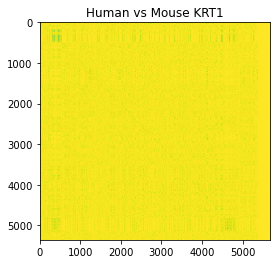

In [51]:
#Show the data by using pylab graphs
pylab.imshow(data)

#Make a title for the graph
pylab.title("Human vs Mouse KRT1")
pylab.show()

Second way of visualizing results

## Analyzing the Results
The result of the pairwise sequence alignment indicates that there were 4131 instances between the two KRT1 gene sequences where the sequences were matched up perfectly. The 4131 instances were out of a possible 5361 (mouse sequence length) instances since the human sequence was longer (5672) which means about 77% of the gene sequence was identical. The dot plot also shows overlap in certain places (hard to see with the current colors), further supporting the similarities between the sequences. As of now, I don't believe that I have enough data to form a conclusive answer for whether or not my hypothesis would be supported or not.